In [41]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

https://www.kaggle.com/code/rafjaa/dealing-with-very-small-datasets#t1

https://medium.com/rants-on-machine-learning/what-to-do-with-small-data-d253254d1a89

# load the data

In [67]:
os.listdir()

['reference_yara_axenic.xlsx',
 '.ipynb_checkpoints',
 'reference_10cc_axenic.xlsx',
 'reference_10cc_all.xlsx',
 '10CC_reference_to_model.ipynb',
 'reference_pro99_axenic.xlsx',
 '10cc_FL_to_cell_numbers.ipynb',
 'reference_ccpa.xlsx',
 'reference_10cc.xlsx',
 'data',
 '10CC_reference_to_model_per_strain.ipynb']

In [68]:
refdf_10cc = pd.read_excel('reference_10cc_all.xlsx')
refdf_ccpa = pd.read_excel('reference_ccpa.xlsx')
refdf_yara = pd.read_excel('reference_yara_axenic.xlsx')


In [69]:
refdf_ccpa[['Group', 'id','full name',  ]].value_counts()
#[~refdf_ccpa['train_Group'].isin(['Other'])]

Group         id              full name             
Strong_Other  MIT0604_DE1     A. mediterranea AltDE1    1338
Strong        MED4_DE1        A. mediterranea AltDE1    1338
Strong_Other  Natl2A_BS11     A. macleodii BS11         1338
              Natl2A_ATCC     A. macleodii ATCC27126    1338
              Natl2A_1A3      A. macleodii HOT1A3       1338
              MIT9313_DE1     A. mediterranea AltDE1    1338
              MIT9312_DE      A. mediterranea AltDE     1338
              MIT9312_1A3     A. macleodii HOT1A3       1338
              MIT0604_DE      A. mediterranea AltDE     1338
              MIT0604_1A3     A. macleodii HOT1A3       1338
              Natl2A_DE1      A. mediterranea AltDE1    1338
Strong        MED4_DE         A. mediterranea AltDE     1338
Other         all_all         Axenic                    1338
Strong_Other  MIT9313_DE      A. mediterranea AltDE     1284
              MIT9313_BS11    A. macleodii BS11         1284
              MIT9312_DE1     A.

In [70]:
refdf_ccpa.groupby('transfer').day.max()

transfer
0    140.708333
2     39.870000
3    140.930000
4    140.900000
5    120.900000
6    122.760000
7    122.750000
Name: day, dtype: float64

In [71]:
refdf_10cc.groupby('transfer').day.max()

transfer
0    128.767361
1     59.980556
2    119.040972
3    100.952083
4     79.987500
5     64.945139
Name: day, dtype: float64

In [72]:
refdf_ccpa.groupby('Sample').day.max().value_counts()

140.708333    91
39.870000     78
140.900000    77
122.750000    76
140.930000    74
122.760000    70
120.900000    69
Name: day, dtype: int64

In [73]:
refdf_yara.groupby('Sample').day.max().value_counts()

89.879861     76
90.987500     76
93.918056     64
90.951389     48
114.788194    16
Name: day, dtype: int64

In [74]:
refdf_10cc.groupby('Sample').day.max().value_counts()

128.767361    30
119.040972    30
100.952083    30
79.987500     30
64.945139     30
59.980556     18
Name: day, dtype: int64

In [75]:
refdf_10cc.loc[refdf_10cc.transfer.isin([0])].day.unique()

array([  0.        ,   1.08194444,   2.16458333,   2.74722222,
         3.75416667,   4.70138889,   5.72013889,   6.73194444,
         7.98402778,   8.94375   ,   9.74583333,  10.83472222,
        11.71805556,  12.83055556,  13.69583333,  16.14097222,
        16.72708333,  17.72708333,  18.71180556,  19.71111111,
        20.77847222,  21.88055556,  23.89861111,  25.73472222,
        26.74722222,  27.85277778,  29.78402778,  31.07638889,
        31.81805556,  32.77916667,  33.73611111,  34.77083333,
        36.90277778,  37.78888889,  39.90833333,  40.84444444,
        41.83472222,  44.75902778,  46.79444444,  47.91875   ,
        48.81041667,  49.90763889,  51.78402778,  53.00208333,
        54.79375   ,  58.8375    ,  59.91180556,  62.89236111,
        65.65138889,  66.99305556,  67.98402778,  69.80208333,
        72.775     ,  73.76875   ,  76.93958333,  79.79513889,
        80.88888889,  81.95833333,  84.21875   ,  86.89236111,
        87.79444444,  88.74861111,  91.        ,  93.78

In [76]:
refdf = pd.concat([refdf_10cc, refdf_ccpa, refdf_yara], ignore_index=True)

In [77]:
refdf

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],PRO,ALT,strain,media,predicted
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845,NaN,NaN,NaN,NaN,NaN
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514,NaN,NaN,NaN,NaN,NaN
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332,NaN,NaN,NaN,NaN,NaN
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685,NaN,NaN,NaN,NaN,NaN
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56940,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,6917400.0,80.062500,0.005,0.117251,0.776791,NaN,NaN,ctrl,lowP(1:50),131321.579908
56941,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7251600.0,83.930556,-0.005,-0.117251,-0.776791,NaN,NaN,ctrl,lowP(1:50),-131321.579908
56942,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7412820.0,85.796528,0.010,0.234503,1.553581,NaN,NaN,ctrl,lowP(1:50),262643.159815
56943,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7942080.0,91.922222,0.038,0.891111,5.903609,NaN,NaN,ctrl,lowP(1:50),998044.007298


In [78]:
refdf['train_Group'] = refdf['Group']
refdf.loc[~refdf.transfer.isin([0]), 'train_Group'] = 'Other'
#refdf.loc[~refdf.PRO.isin(['MED4']), 'train_Group'] = 'Other'


In [79]:
refdf.groupby(['train_Group', 'id','full name',  ]).size().head(50)
#[~refdf_ccpa['train_Group'].isin(['Other'])]

train_Group   id               full name                     
Axenic        1                Axenic                            222
              MED4_Ax_Pro      Axenic                            264
Axenic_Other  MIT0604_Ax_Pro   Axenic_MIT0604                     88
              MIT9312_Ax_Pro   Axenic_MIT9312                    264
              MIT9313_Ax_Pro   Axenic_MIT9313                    264
              Natl2A_Ax_Pro    Axenic_Natl2A                     264
Inhibited     3                Marinobacter adhaerens HP15       222
              4                Phaeobacter gallaeciensis         222
Other         1                Axenic                            471
              2                A. macleodii 1A3                  471
              3                Marinobacter adhaerens HP15       471
              4                Phaeobacter gallaeciensis         471
              5                Pseudoalteromonas haloplanktis    471
              6                Ruegeria p

In [80]:
refdf.Sample.nunique()

983

In [81]:
refdf.Group.unique()

array(['Weak', 'Axenic', 'Strong', 'Inhibited', 'Sustained',
       'Strong_Other', 'Axenic_Other', 'Other'], dtype=object)

In [84]:
groupby_cols = [ 'Sample', 'id',  'full name',  'Group',]
refdf[groupby_cols].value_counts().groupby('Group').size()

Group
Axenic           33
Axenic_Other    278
Inhibited        36
Other            35
Strong          133
Strong_Other    390
Sustained        33
Weak             45
dtype: int64

In [85]:
groupby_cols = [ 'Sample', 'id',  'full name',  'train_Group',]
refdf[groupby_cols].value_counts().groupby('train_Group').size()

train_Group
Axenic            6
Axenic_Other     10
Inhibited         6
Other           867
Strong           21
Strong_Other     58
Sustained         6
Weak              9
dtype: int64

In [86]:
refdf['full name'].unique()

array(['Marinovum 5F3', 'Roseovarius 5C3', 'Axenic', 'A. macleodii 1A3',
       'Marinobacter adhaerens HP15', 'Phaeobacter gallaeciensis',
       'Pseudoalteromonas haloplanktis', 'Ruegeria pomeroyi',
       'Sulfitobacter pseudonitzschiae', 'E. coli', 'A. macleodii HOT1A3',
       'A. mediterranea AltDE', 'A. mediterranea AltDE1',
       'A. macleodii BS11', 'A. macleodii ATCC27126', 'Axenic_MIT0604',
       'Axenic_Natl2A', 'Axenic_MIT9312', 'Axenic_MIT9313',
       'Axenic_MED4_Pro99', 'Axenic_MED4_lowN', 'Axenic_MED4_lowP(1:8)',
       'Axenic_MED4_lowP(1:50)', 'Axenic_9312_Pro99', 'Axenic_9312_lowN',
       'Axenic_9312_lowP(1:8)', 'Axenic_9312_lowP(1:50)',
       'Axenic_9313_Pro99', 'Axenic_9313_lowN', 'Axenic_9313_lowP(1:8)',
       'Axenic_9313_lowP(1:50)', 'Axenic_1327_Pro99', 'Axenic_1327_lowN',
       'Axenic_1327_lowP(1:8)', 'Axenic_1327_lowP(1:50)',
       'Axenic_MIT0604_Pro99', 'Axenic_MIT0604_lowN',
       'Axenic_MIT0604_lowP(1:8)', 'Axenic_MIT0604_lowP(1:50)',
     

In [87]:
refdf.head()

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],PRO,ALT,strain,media,predicted,train_Group
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845,NaN,NaN,NaN,NaN,NaN,Weak
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514,NaN,NaN,NaN,NaN,NaN,Weak
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332,NaN,NaN,NaN,NaN,NaN,Weak
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685,NaN,NaN,NaN,NaN,NaN,Weak
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483,NaN,NaN,NaN,NaN,NaN,Weak


In [88]:
refdf.describe()

,transfer,transfer day,t,day,FL,ref_Bp[N],ref_Bp[C],predicted
count,40901.000000,6486.000000,5.694500e+04,56945.000000,56945.000000,56945.000000,56945.000000,1.604400e+04
mean,3.212464,39.734770,4.369250e+06,50.570018,0.526833,12.354384,81.847791,1.885563e+07
std,2.327815,38.448158,3.136950e+06,36.307292,0.962164,22.563011,149.479946,3.485655e+07
min,0.000000,0.000000,0.000000e+00,0.000000,-0.057000,-1.336666,-8.855413,-1.497066e+06
25%,0.000000,0.000000,1.791936e+06,20.740000,0.043000,1.008362,6.680399,9.980440e+05
50%,3.000000,41.843750,3.690900e+06,42.718750,0.152000,3.564443,23.614434,2.784017e+06
75%,5.000000,59.923611,6.637440e+06,76.822222,0.541000,12.686603,84.048742,1.733445e+07
max,7.000000,128.984028,1.217635e+07,140.930000,10.541000,247.189424,1637.629933,2.499050e+08


In [89]:
refdf.columns

Index(['Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group', 't', 'day', 'FL', 'ref_Bp[N]', 'ref_Bp[C]', 'PRO',
       'ALT', 'strain', 'media', 'predicted', 'train_Group'],
      dtype='object')

# create dataset using shuffling of data

In [7]:
groupby_cols = [ 'id',  
       'full name',  'Group',  't', 'day',]

refdf_samples = refdf.groupby(groupby_cols).sample(50, replace=True, random_state=12345)
refdf_samples['sample_number'] = refdf_samples.groupby(groupby_cols).cumcount()

In [8]:
refdf_samples['shuffle_id'] = refdf_samples['id'].astype(str) + '_' + refdf_samples['sample_number'].astype(str)

# Compute features

In [229]:
def _compute_max_features(df, groupby_col, nutrient, biomass_prefix):
    refmaxbp_df = df.loc[df.groupby(groupby_col)[f'{biomass_prefix}[{nutrient}]'].idxmax()].reset_index(drop=True)
    refmaxbp_df = refmaxbp_df.set_index(groupby_col)
    refmaxbp_df = refmaxbp_df[['day', f'{biomass_prefix}[{nutrient}]']]
    refmaxbp_df.rename(columns={
        'day' : f'max_{nutrient}day', 
        f'{biomass_prefix}[{nutrient}]' : f'max_{nutrient}biomass',
    }, inplace=True)
    return refmaxbp_df

def _compute_mean_features(df, groupby_col, nutrient, biomass_prefix):
    min_day = 30
    max_day = 60
    lterm_df = df.loc[df.day.ge(min_day) & df.day.le(max_day)]
    reflterm_df = lterm_df.groupby(groupby_col)[f'{biomass_prefix}[{nutrient}]'].agg(['mean', 'std', 'median'])
    reflterm_df.rename(columns={
        'mean' : f'mean_{nutrient}biomass',
        'median' : f'median_{nutrient}biomass',
        'std' : f'std_{nutrient}biomass',
    }, inplace=True)
    return reflterm_df

def _compute_lastday_features(df, groupby_col, nutrient, biomass_prefix):
    lod_lastday_threshold = 2
    refmaxday_df = df.loc[df[f'{biomass_prefix}[{nutrient}]'].ge(lod_lastday_threshold)].groupby(groupby_col).day.max()
    #refmaxday_df.rename(columns=dict(day=f'last_day{nutrient}'), inplace=True)
    refmaxday_df.name = f'last_day{nutrient}'
    return refmaxday_df

def _compute_features(df, groupby_col, biomass_prefix):
    #return (
    df_list = (
        [_compute_max_features(df, groupby_col, nutrient, biomass_prefix) for nutrient in 'NC'] +
        [_compute_mean_features(df, groupby_col, nutrient, biomass_prefix) for nutrient in 'NC'] +
        [_compute_lastday_features(df, groupby_col, nutrient, biomass_prefix) for nutrient in 'NC']
    )
    df_merge = df_list[0].join(df_list[1:])
        
    df_merge.fillna(0, inplace=True) # for last day
    return df_merge
    

In [217]:
# log the biomass
def add_log_cols(df, biomass_prefix):
    lod_threshold = 1
    for nutrient in 'NC':
        df[f'log_{nutrient}biomass'] = np.log(df[f'{biomass_prefix}[{nutrient}]'].clip(lower=lod_threshold))
    return df

In [138]:
refdf_samples = add_log_cols(refdf_samples, 'ref_Bp')

In [174]:
x_groupby_col = ['shuffle_id', 'id', 'full name', ]# 'Group']
x_log_col = [f'log_{nutrient}biomass' for nutrient in 'NC']

pfeature_df = _compute_features(refdf_samples, x_groupby_col, 'ref_Bp')
prefdf_samples = refdf_samples.pivot(index=x_groupby_col, values=x_log_col, columns='day')
prefdf_samples.columns = [f'{col}_{day:2.2f}' for col,day in prefdf_samples.columns.values]

logistic_Nfeatures = [c for c in prefdf_samples.columns if c.startswith('log_Nbiomass')]
logistic_Cfeatures = [c for c in prefdf_samples.columns if c.startswith('log_Cbiomass')]
forest_features = pfeature_df.columns
X = pfeature_df.join(prefdf_samples)
y = X.index.get_level_values(1)


In [176]:
y

Int64Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='id', length=183926)

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=345)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((110355, 160), (110355,), (73571, 160), (73571,))

# Stacking classifier

The goal is to create multiple classifiers:
1. randomforest based on generated features: last day, max day, max value, mean late biomass (N & C), std late biomass (N & C)
2. logical regression based on N biomass
3. logical regression based on C biomass
4. tslearn based on N biomass 
5. tslearn based on C biomass 

and than combine the results using a stacking classifier

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingClassifier
# Classifiers
clf_features = RandomForestClassifier()
clf_logisticN = LogisticRegression(penalty='l2', C=0.1, max_iter=10000)
clf_logisticC = LogisticRegression(penalty='l2', C=0.1, max_iter=10000)
clf_meta = LogisticRegression()

pipe_logisticN = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', logistic_Nfeatures)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_logisticN)
],
    memory='/tmp/Osnat/sklearn_cache',
)
pipe_logisticC = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', logistic_Cfeatures)], remainder='drop')),
    ('scale', StandardScaler()),    
    ('clf', clf_logisticC)
],
    memory='/tmp/Osnat/sklearn_cache',
)
pipe_forest = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', forest_features)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_features)
],
    memory='/tmp/Osnat/sklearn_cache',
)



stack = StackingClassifier(
    estimators=[
        ('logisticN', pipe_logisticN),
        ('logisticC', pipe_logisticC),
        ('ForestFeatures', pipe_forest),
    ],
    final_estimator=clf_meta,
    n_jobs = -1, verbose=True
)

stack.fit(X_train, y_train)


NameError: name 'logistic_Nfeatures' is not defined

In [191]:
y_pred_prop = stack.predict_proba(X_test)
y_pred = stack.predict(X_test)

In [193]:
print(stack.score(X_train, y_train), stack.score(X_test, y_test))
print(metrics.classification_report(y_test, y_pred))

1.0 1.0
              precision    recall  f1-score   support

           2       1.00      1.00      1.00     10499
           3       1.00      1.00      1.00      7954
           4       1.00      1.00      1.00      6391
           5       1.00      1.00      1.00     10079
           6       1.00      1.00      1.00      6000
           7       1.00      1.00      1.00      8734
           9       1.00      1.00      1.00      7348
          10       1.00      1.00      1.00      8537
          11       1.00      1.00      1.00      8029

    accuracy                           1.00     73571
   macro avg       1.00      1.00      1.00     73571
weighted avg       1.00      1.00      1.00     73571



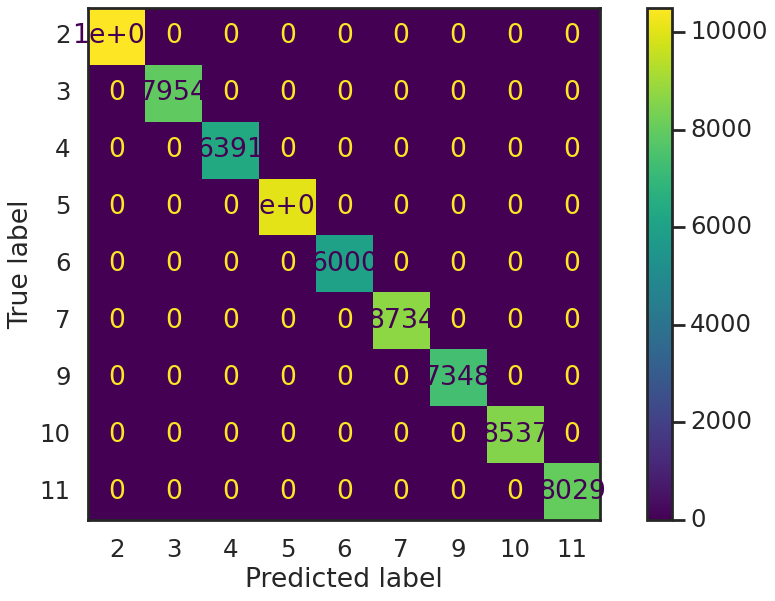

In [194]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=stack.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=stack.classes_)
disp.plot()
plt.show()

In [190]:
y_pred_prop

array([[9.99799497e-01, 2.51248063e-05, 2.47148470e-05, ...,
        2.49916019e-05, 2.52724728e-05, 2.51667134e-05],
       [3.49140977e-05, 3.41514996e-05, 3.35887772e-05, ...,
        9.99726027e-01, 3.43246150e-05, 3.42507641e-05],
       [3.11312375e-05, 3.04515418e-05, 2.99580899e-05, ...,
        3.07757602e-05, 9.99755533e-01, 3.05840043e-05],
       ...,
       [3.21381948e-05, 3.14580339e-05, 3.09125705e-05, ...,
        3.13053732e-05, 3.15974973e-05, 9.99748082e-01],
       [2.99545392e-05, 2.92863615e-05, 2.88074739e-05, ...,
        2.91310519e-05, 2.94612269e-05, 2.93369419e-05],
       [3.50163852e-05, 3.42514928e-05, 3.36872014e-05, ...,
        9.99725119e-01, 3.46428646e-05, 3.42963915e-05]])

In [197]:
df_predicted = pd.DataFrame(y_pred_prop, columns=stack.classes_)
df_predicted['y'] = y_test
df_predicted
mdf_predicted = df_predicted.melt(id_vars='y', var_name='predicted', value_name='prob')
mdf_predicted.predicted = pd.to_numeric(mdf_predicted.predicted)
mdf_predicted['predicted_correctly'] = mdf_predicted['y'] == mdf_predicted['predicted']


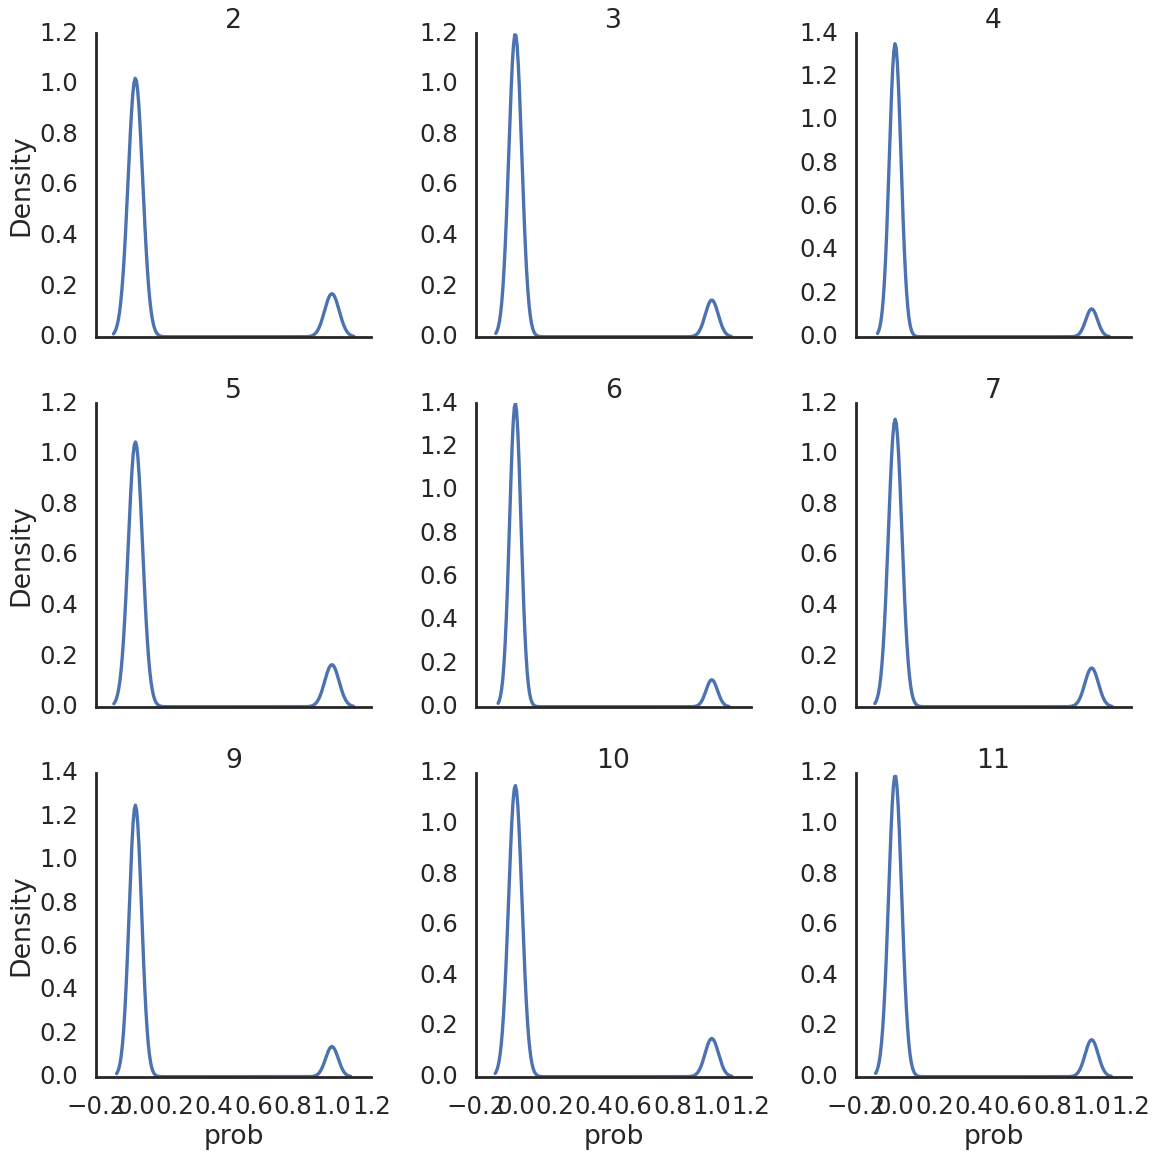

In [202]:
g=sns.displot(data=mdf_predicted, #.loc[mdf_predicted.predicted.isin([3])], 
            x='prob',
            kind='kde',
            col='predicted',
            #hue='predicted_correctly',
            col_wrap=3,
              #log_scale=True,
          #clip=(0,1),
              facet_kws=dict(sharey=False),
           )
g.set_titles(col_template='{col_name}')
#g.set(yscale='log')

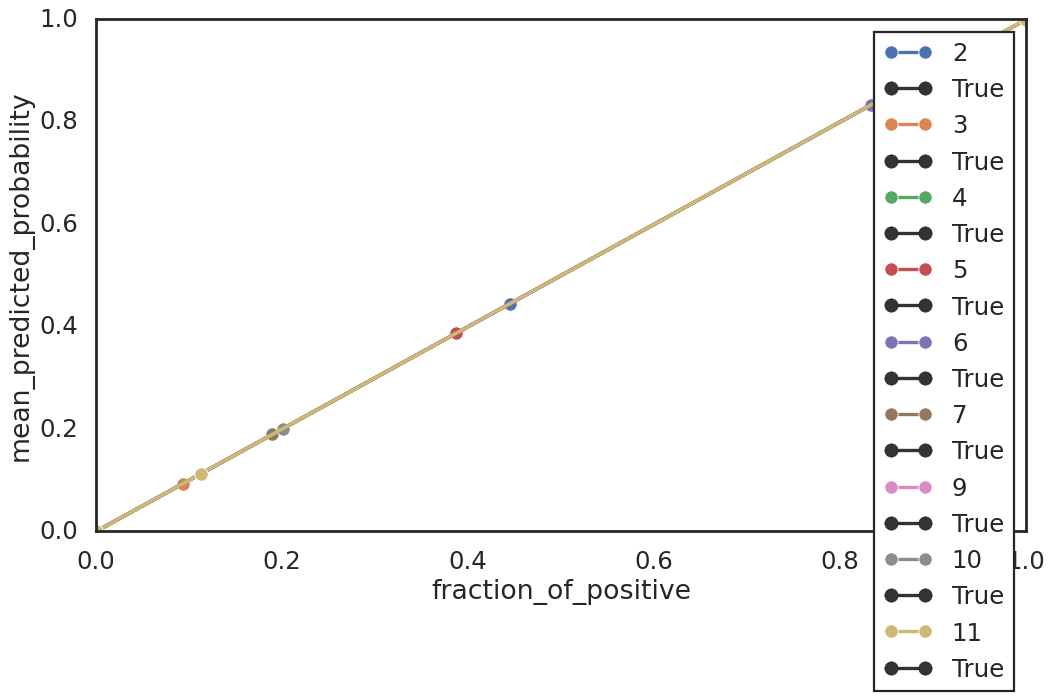

In [203]:
from sklearn.calibration import calibration_curve
for class_ in stack.classes_:
    sns.lineplot(
    #sns.scatterplot(
        data=pd.DataFrame(calibration_curve(
            y_test==class_, df_predicted[class_], 
            strategy='quantile', 
            n_bins=10,)).T,
        x=0, y=1, markers=True, style=True,
        label=class_
    )
plt.gca().set(xlabel='fraction_of_positive', ylabel='mean_predicted_probability')
plt.show()

In [338]:
refdfX = add_log_cols(refdf, 'ref_Bp')

In [341]:
x_groupby_col = ['Sample', 'id', 'full name', ]# 'Group']
x_log_col = [f'log_{nutrient}biomass' for nutrient in 'NC']

preffeature_df = _compute_features(refdfX, x_groupby_col, 'ref_Bp')
prefdfX = refdfX.pivot(index=x_groupby_col, values=x_log_col, columns='day')
prefdfX.columns = [f'{col}_{day:2.2f}' for col,day in prefdfX.columns.values]

X_ref = preffeature_df.join(prefdfX)
y_ref = X_ref.index.get_level_values(1)


In [342]:
y_ref_pred_prop = stack.predict_proba(X_ref)
y_ref_pred = stack.predict(X_ref)

In [343]:
max_ref_prob = np.amax(y_ref_pred_prop, axis=1)
max_ref_prob

array([0.99773138, 0.9997378 , 0.80437068, 0.99973691, 0.99942477,
       0.9994504 , 0.99979951, 0.9997996 , 0.99775738, 0.99973935,
       0.99974227, 0.99974217, 0.99968856, 0.99968961, 0.99968959,
       0.99522639, 0.99094695, 0.9997881 , 0.99967594, 0.99967329,
       0.99967042, 0.99976612, 0.99876565, 0.99974566, 0.99946486,
       0.99965539, 0.99972713])

In [345]:
refdf_predicted_classes = pd.DataFrame({
    'y' : y_ref,
    'y_pred' : y_ref_pred,
    'max_prob' : max_ref_prob,
})
refdf_predicted_classes

,y,y_pred,max_prob
0,10,10,0.997731
1,10,10,0.999738
2,10,10,0.804371
3,11,11,0.999737
4,11,11,0.999425
5,11,11,0.999450
6,2,2,0.999800
7,2,2,0.999800
8,2,2,0.997757
9,3,3,0.999739


# classify simulations

In [291]:
dpath = '../results'
sim_df = pd.read_csv(os.path.join(dpath,'monte4_df.csv.gz',))


In [292]:
sim_df = sim_df[['run_id', 'day', 'Bptotal[N]','Bptotal[C]']]

In [293]:
min_values = sim_df.groupby('run_id').min().min(axis=1)
bad_ids_negative_values = set(min_values[min_values< 0].index)
len(bad_ids_negative_values)

1019

In [294]:
max_values = sim_df.groupby('run_id').max().max(axis=1)
bad_ids_toobig_values = set(max_values[max_values>1e5].index)
len(bad_ids_toobig_values)

4

In [295]:
sim_df = sim_df.loc[~sim_df.run_id.isin(bad_ids_negative_values | bad_ids_toobig_values)].copy()

In [296]:
sim_df = add_log_cols(sim_df, 'Bptotal')

In [297]:
sim_groupby_col = ['run_id', ]# 'Group']
sim_log_col = [f'log_{nutrient}biomass' for nutrient in 'NC']

psim_feature_df = _compute_features(sim_df, sim_groupby_col, 'Bptotal')
psim_df = sim_df.pivot(index=sim_groupby_col, values=sim_log_col, columns='day')
psim_df.columns = [f'{col}_{day:2.2f}' for col,day in psim_df.columns.values]

X_sim = psim_feature_df.join(psim_df)


In [298]:
[c for c in X_sim.columns if c not in X_train.columns], [c for c in X_train.columns if c not in X_sim.columns]

(['log_Nbiomass_72.78', 'log_Cbiomass_72.78'],
 ['log_Nbiomass_72.77', 'log_Cbiomass_72.77'])

In [299]:
X_sim.rename(columns={
    'log_Nbiomass_72.78' : 'log_Nbiomass_72.77',
    'log_Cbiomass_72.78' : 'log_Cbiomass_72.77',
}, inplace=True)

In [300]:
[c for c in X_sim.columns if c not in X_train.columns],[c for c in X_train.columns if c not in X_sim.columns]

([], [])

In [301]:
X_sim.loc[X_sim.isna().sum(axis=1).ge(1)]

,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,mean_Nbiomass,std_Nbiomass,median_Nbiomass,mean_Cbiomass,std_Cbiomass,median_Cbiomass,...,log_Cbiomass_94.92,log_Cbiomass_96.83,log_Cbiomass_98.00,log_Cbiomass_100.74,log_Cbiomass_107.71,log_Cbiomass_110.94,log_Cbiomass_115.85,log_Cbiomass_118.79,log_Cbiomass_121.78,log_Cbiomass_128.77
run_id,,,,,,,,,,,,,,,,,,,,,
monte4_OVERFLOW_19_monte_vpro_3365_OVERFLOW_51_lowN_all_OVERFLOW_h-2074384540759412348,10.834722,48.653135,10.834722,322.327022,0.221952,0.282856,0.084390,1.470429,1.873923,0.559084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monte4_OVERFLOW_23_monte_vpro_3130_OVERFLOW_44_lowN_all_OVERFLOW_h-2074384540759412348,6.731944,28.109097,6.731944,186.222766,0.120056,0.139613,0.056419,0.795372,0.924938,0.373776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
monte4_OVERFLOW_24_monte_vpro_3125_OVERFLOW_41_lowN_all_OVERFLOW_h-2074384540759412348,5.720139,134.980395,5.720139,894.245117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monte4_OVERFLOW_36_monte_vpro_494_OVERFLOW_31_lowN_all_OVERFLOW_h-2074384540759412348,3.754167,5.836880,3.754167,38.669328,0.000349,0.000521,0.000080,0.002312,0.003455,0.000531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monte4_OVERFLOW_41_monte_vpro_3333_OVERFLOW_37_lowN_all_OVERFLOW_h-2074384540759412348,9.745833,53.832826,9.745833,356.642469,0.116595,0.158121,0.036975,0.772440,1.047551,0.244959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
monte4_ROS_94_monte_vpro_3887_ROS_44_lowN_all_ROS_h5853139000967720769,7.984028,43.963516,7.984028,428.393762,0.000518,0.000971,0.000027,0.005119,0.009589,0.000270,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
monte4_ROS_95_monte_vpro_4334_ROS_58_lowN_all_ROS_h5853139000967720769,6.731944,23.983189,6.731944,225.824014,0.000133,0.000252,0.000006,0.001317,0.002503,0.000061,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
monte4_ROS_96_monte_vpro_3504_ROS_34_lowN_all_ROS_h5853139000967720769,6.731944,39.749289,6.731944,384.000751,0.001387,0.002408,0.000133,0.013727,0.023821,0.001318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [302]:
X_sim = X_sim.loc[~X_sim.isna().sum(axis=1).ge(1)]

In [303]:
X_sim.loc[X_sim.isna().sum(axis=1).ge(1)]

,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,mean_Nbiomass,std_Nbiomass,median_Nbiomass,mean_Cbiomass,std_Cbiomass,median_Cbiomass,...,log_Cbiomass_94.92,log_Cbiomass_96.83,log_Cbiomass_98.00,log_Cbiomass_100.74,log_Cbiomass_107.71,log_Cbiomass_110.94,log_Cbiomass_115.85,log_Cbiomass_118.79,log_Cbiomass_121.78,log_Cbiomass_128.77
run_id,,,,,,,,,,,,,,,,,,,,,


In [304]:
X_sim.max()

max_Nday                128.767361
max_Nbiomass            335.740205
max_Cday                128.767361
max_Cbiomass           2224.278861
mean_Nbiomass           306.479875
                          ...     
log_Cbiomass_110.94       7.705770
log_Cbiomass_115.85       7.706300
log_Cbiomass_118.79       7.706558
log_Cbiomass_121.78       7.706783
log_Cbiomass_128.77       7.707188
Length: 160, dtype: float64

In [316]:
refdf.max()

Sample                                     9C0
id                                          11
replicate                                    C
transfer                                     0
transfer day                                 0
heterotroph                            nitzsch
full name       Sulfitobacter pseudonitzschiae
Group                                     Weak
t                                   11125500.0
day                                 128.767361
FL                                    6.072667
ref_Bp[N]                           142.405747
ref_Bp[C]                           943.438071
dtype: object

In [305]:
y_sim_pred_prop = stack.predict_proba(X_sim)
y_sim_pred = stack.predict(X_sim)

In [313]:
max_sim_prob = np.amax(y_sim_pred_prop, axis=1)
max_sim_prob

array([0.83445231, 0.98131037, 0.87944205, ..., 0.98024406, 0.93192021,
       0.97035085])

In [323]:
df_predicted_classes = pd.DataFrame({
    'run_id' : X_sim.index,
    'y_pred' : y_sim_pred,
    'max_prob' : max_sim_prob,
})
df_predicted_classes

,run_id,y_pred,max_prob
0,monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYM...,9,0.834452
1,monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYM...,9,0.981310
2,monte4_EXOENZYME_100_monte_vpro_3135_EXOENZYME...,9,0.879442
3,monte4_EXOENZYME_100_monte_vpro_3143_EXOENZYME...,9,0.627267
4,monte4_EXOENZYME_100_monte_vpro_3147_EXOENZYME...,9,0.977208
...,...,...,...
42591,monte4_ROS_9_monte_vpro_4197_ROS_12_lowN_all_R...,9,0.756888
42592,monte4_ROS_9_monte_vpro_4434_ROS_13_lowN_all_R...,9,0.884157
42593,monte4_ROS_9_monte_vpro_4538_ROS_1_lowN_all_RO...,9,0.980244
42594,monte4_ROS_9_monte_vpro_4738_ROS_2_lowN_all_RO...,9,0.931920


In [324]:
df_predicted_classes[['idx', 'media', 'which', 'model', 'hash']] = df_predicted_classes.run_id.str.rsplit('_', n=4, expand=True)


In [328]:
class_meta_df  = refdf[['id', 'full name', 'Group']].value_counts().reset_index()

In [332]:
df_predicted_classes = df_predicted_classes.merge(
    class_meta_df[['id', 'full name', 'Group']], 
    right_on='id', left_on='y_pred', how='left')

In [333]:
df_predicted_classes

,run_id,y_pred,max_prob,idx,media,which,model,hash,id,full name,Group
0,monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYM...,9,0.834452,monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYM...,lowN,all,EXOENZYME,h1628948357718170805,9,E. coli,Weak
1,monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYM...,9,0.981310,monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYM...,lowN,all,EXOENZYME,h1628948357718170805,9,E. coli,Weak
2,monte4_EXOENZYME_100_monte_vpro_3135_EXOENZYME...,9,0.879442,monte4_EXOENZYME_100_monte_vpro_3135_EXOENZYME_37,lowN,all,EXOENZYME,h1628948357718170805,9,E. coli,Weak
3,monte4_EXOENZYME_100_monte_vpro_3143_EXOENZYME...,9,0.627267,monte4_EXOENZYME_100_monte_vpro_3143_EXOENZYME_43,lowN,all,EXOENZYME,h1628948357718170805,9,E. coli,Weak
4,monte4_EXOENZYME_100_monte_vpro_3147_EXOENZYME...,9,0.977208,monte4_EXOENZYME_100_monte_vpro_3147_EXOENZYME_23,lowN,all,EXOENZYME,h1628948357718170805,9,E. coli,Weak
...,...,...,...,...,...,...,...,...,...,...,...
42591,monte4_ROS_9_monte_vpro_4197_ROS_12_lowN_all_R...,9,0.756888,monte4_ROS_9_monte_vpro_4197_ROS_12,lowN,all,ROS,h5853139000967720769,9,E. coli,Weak
42592,monte4_ROS_9_monte_vpro_4434_ROS_13_lowN_all_R...,9,0.884157,monte4_ROS_9_monte_vpro_4434_ROS_13,lowN,all,ROS,h5853139000967720769,9,E. coli,Weak
42593,monte4_ROS_9_monte_vpro_4538_ROS_1_lowN_all_RO...,9,0.980244,monte4_ROS_9_monte_vpro_4538_ROS_1,lowN,all,ROS,h5853139000967720769,9,E. coli,Weak
42594,monte4_ROS_9_monte_vpro_4738_ROS_2_lowN_all_RO...,9,0.931920,monte4_ROS_9_monte_vpro_4738_ROS_2,lowN,all,ROS,h5853139000967720769,9,E. coli,Weak


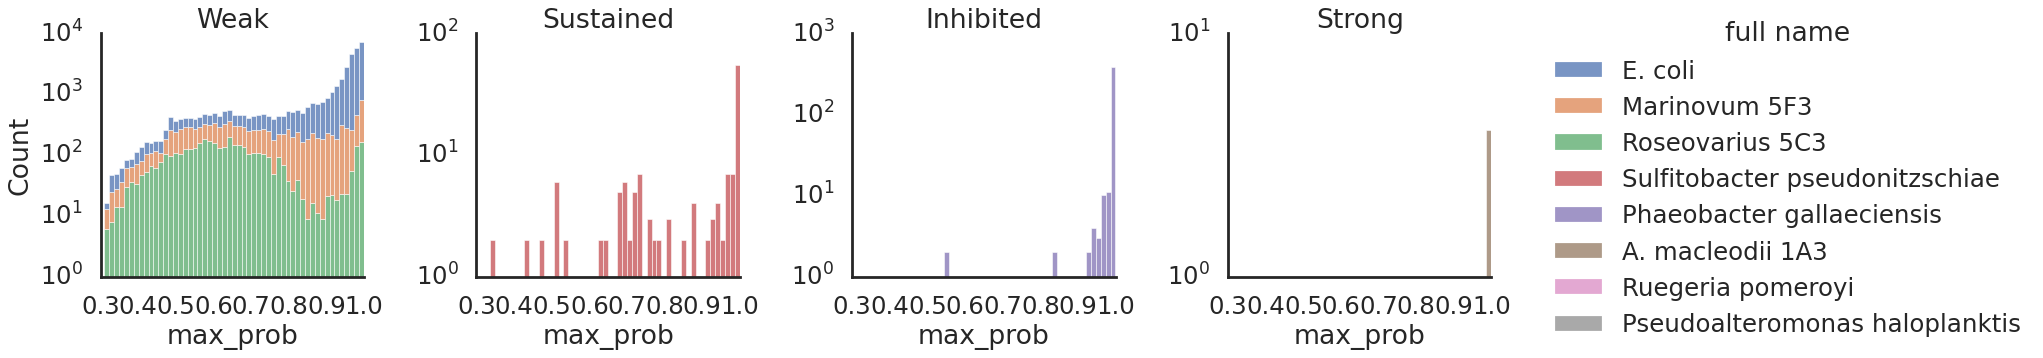

In [348]:
g = sns.displot(
    data=df_predicted_classes,
    x='max_prob', 
    col='Group', hue='full name', multiple='stack', 
    facet_kws=dict(sharey=False, ),
    #row='model',

)
g.set_titles(col_template='{col_name}')
g.set(yscale='log')

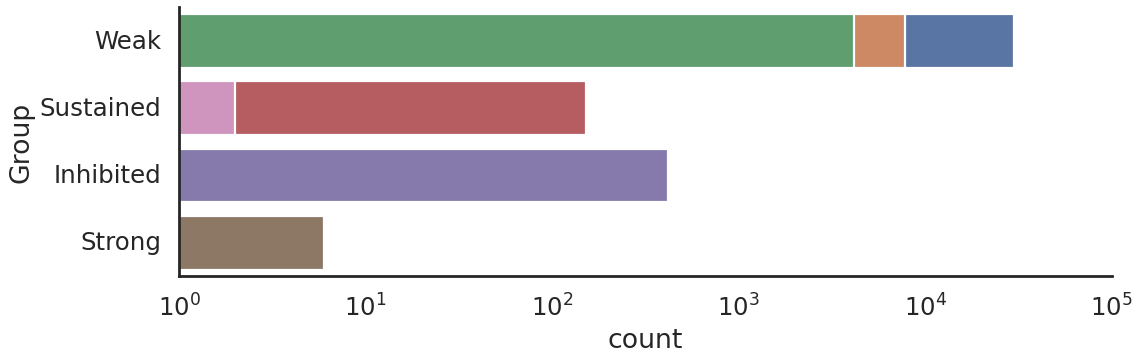

In [367]:
g = sns.catplot(
    data=df_predicted_classes.reset_index(),
    #x='max_prob', 
    y='Group', hue='full name', dodge=False,
    kind='count',
    legend=False,
    aspect=3,
)
#g.set_titles(col_template='{col_name}')
g.set(xscale='log')

In [349]:
sim_df

,run_id,day,Bptotal[N],Bptotal[C],log_Nbiomass,log_Cbiomass
0,monte4_ROS_38_monte_vpro_4876_ROS_59_lowN_all_...,0.000000,0.892857,5.915179,0.000000,1.777522
1,monte4_ROS_38_monte_vpro_4876_ROS_59_lowN_all_...,1.081944,2.479189,11.850470,0.907931,2.472368
2,monte4_ROS_38_monte_vpro_4876_ROS_59_lowN_all_...,2.164583,4.956136,23.678559,1.600626,3.164570
3,monte4_ROS_38_monte_vpro_4876_ROS_59_lowN_all_...,2.747222,7.191525,34.358417,1.972903,3.536847
4,monte4_ROS_38_monte_vpro_4876_ROS_59_lowN_all_...,3.754167,13.683119,65.373152,2.616163,4.180112
...,...,...,...,...,...,...
3232763,monte4_EXOENZYME_99_monte_vpro_3911_EXOENZYME_...,110.943750,0.000017,0.000143,0.000000,0.000000
3232764,monte4_EXOENZYME_99_monte_vpro_3911_EXOENZYME_...,115.845833,0.000009,0.000074,0.000000,0.000000
3232765,monte4_EXOENZYME_99_monte_vpro_3911_EXOENZYME_...,118.788889,0.000006,0.000050,0.000000,0.000000
3232766,monte4_EXOENZYME_99_monte_vpro_3911_EXOENZYME_...,121.777778,0.000004,0.000033,0.000000,0.000000


In [353]:
sample_ids = df_predicted_classes.groupby('id').run_id.sample(50, replace=True)

In [355]:
sample_df = sim_df.loc[sim_df[f'Bptotal[N]'].ge(1) & sim_df.run_id.isin(sample_ids)]
sample_df = sample_df.merge(df_predicted_classes, on='run_id', how='left')
sample_df

,run_id,day,Bptotal[N],Bptotal[C],log_Nbiomass,log_Cbiomass,y_pred,max_prob,idx,media,which,model,hash,id,full name,Group
0,monte4_EXOENZYME_61_monte_vpro_4131_EXOENZYME_...,1.081944,1.761304,11.557965,0.566055,2.447375,7,0.637511,monte4_EXOENZYME_61_monte_vpro_4131_EXOENZYME_74,lowN,all,EXOENZYME,h1628948357718170805,7,Sulfitobacter pseudonitzschiae,Sustained
1,monte4_EXOENZYME_61_monte_vpro_4131_EXOENZYME_...,2.164583,3.290496,21.588319,1.191038,3.072152,7,0.637511,monte4_EXOENZYME_61_monte_vpro_4131_EXOENZYME_74,lowN,all,EXOENZYME,h1628948357718170805,7,Sulfitobacter pseudonitzschiae,Sustained
2,monte4_EXOENZYME_61_monte_vpro_4131_EXOENZYME_...,2.747222,4.604976,30.212539,1.527137,3.408257,7,0.637511,monte4_EXOENZYME_61_monte_vpro_4131_EXOENZYME_74,lowN,all,EXOENZYME,h1628948357718170805,7,Sulfitobacter pseudonitzschiae,Sustained
3,monte4_EXOENZYME_61_monte_vpro_4131_EXOENZYME_...,3.754167,8.230990,54.005189,2.107906,3.989080,7,0.637511,monte4_EXOENZYME_61_monte_vpro_4131_EXOENZYME_74,lowN,all,EXOENZYME,h1628948357718170805,7,Sulfitobacter pseudonitzschiae,Sustained
4,monte4_EXOENZYME_61_monte_vpro_4131_EXOENZYME_...,4.701389,14.211117,93.253561,2.654025,4.535322,7,0.637511,monte4_EXOENZYME_61_monte_vpro_4131_EXOENZYME_74,lowN,all,EXOENZYME,h1628948357718170805,7,Sulfitobacter pseudonitzschiae,Sustained
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6823,monte4_OVERFLOW_98_monte_vpro_3722_OVERFLOW_63...,2.164583,2.026622,13.426369,0.706370,2.597221,4,0.999676,monte4_OVERFLOW_98_monte_vpro_3722_OVERFLOW_63,lowN,all,OVERFLOW,h-2074384540759412348,4,Phaeobacter gallaeciensis,Inhibited
6824,monte4_OVERFLOW_98_monte_vpro_3722_OVERFLOW_63...,2.747222,1.814371,12.020208,0.595739,2.486589,4,0.999676,monte4_OVERFLOW_98_monte_vpro_3722_OVERFLOW_63,lowN,all,OVERFLOW,h-2074384540759412348,4,Phaeobacter gallaeciensis,Inhibited
6825,monte4_OVERFLOW_98_monte_vpro_3722_OVERFLOW_63...,3.754167,1.498614,9.928316,0.404541,2.295391,4,0.999676,monte4_OVERFLOW_98_monte_vpro_3722_OVERFLOW_63,lowN,all,OVERFLOW,h-2074384540759412348,4,Phaeobacter gallaeciensis,Inhibited
6826,monte4_OVERFLOW_98_monte_vpro_3722_OVERFLOW_63...,4.701389,1.251925,8.294002,0.224682,2.115533,4,0.999676,monte4_OVERFLOW_98_monte_vpro_3722_OVERFLOW_63,lowN,all,OVERFLOW,h-2074384540759412348,4,Phaeobacter gallaeciensis,Inhibited


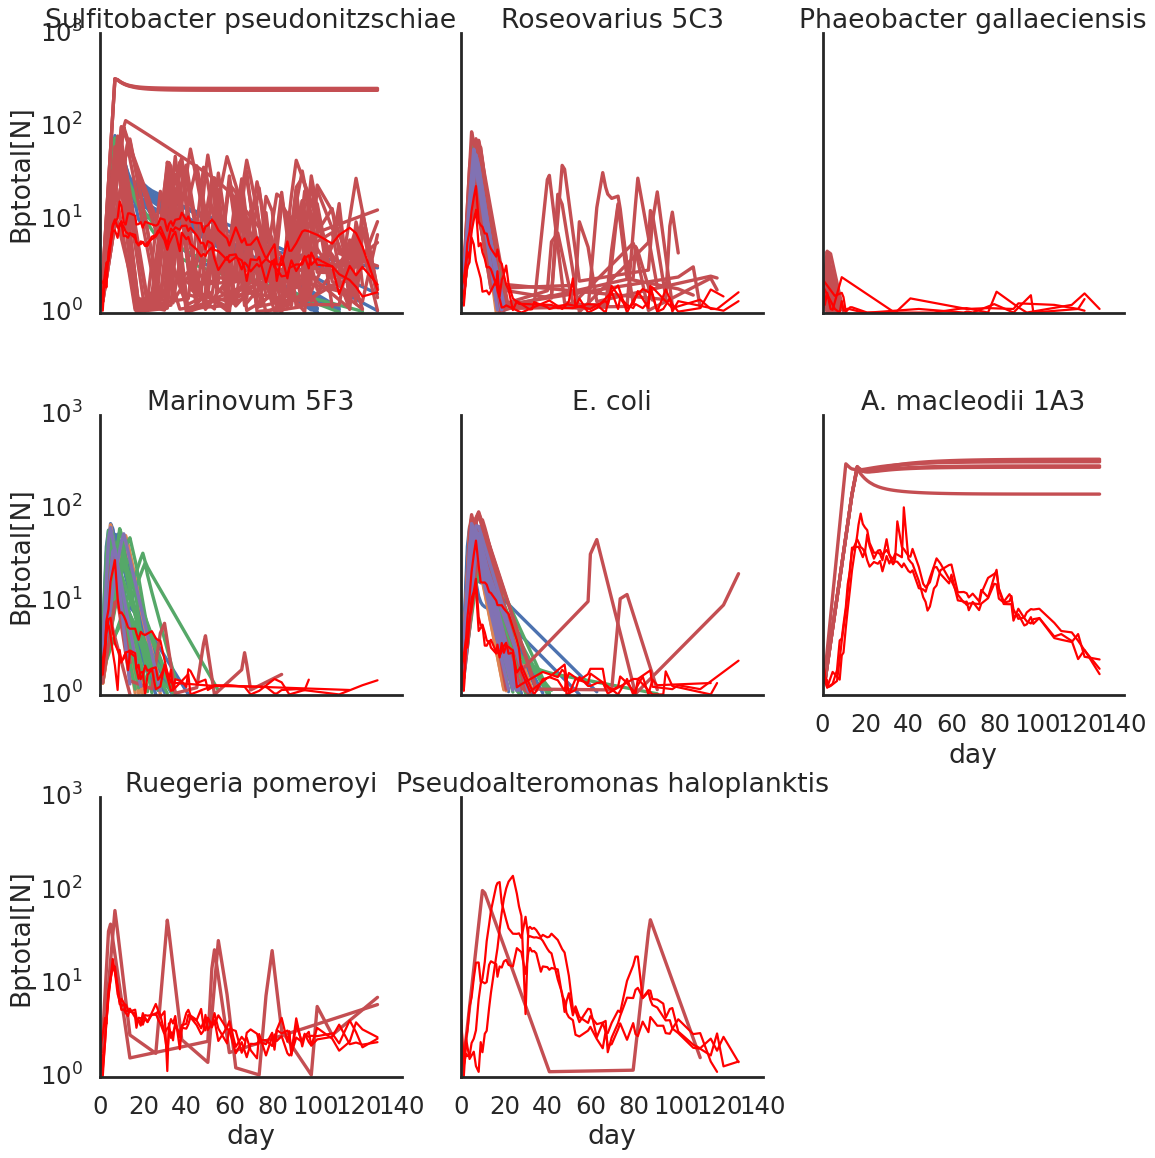

In [360]:
    g = sns.relplot(
        data=sample_df,
        kind='line', 
        estimator=None, units='run_id',
        hue='model',
        x='day', y=f'Bptotal[N]', 
        col='full name', col_wrap=3,
        facet_kws=dict( margin_titles=True),
        legend=False
    )
    for (col_val), ax in g.axes_dict.items():
        sns.lineplot(
            data=refdf.loc[refdf[f'ref_Bp[N]'].ge(1) & refdf['full name'].isin([col_val])],
            x='day', y=f'ref_Bp[N]',
        units='Sample', estimator=None, ax=ax, lw=2, color='red',

                     legend=False
                    )
    g.set(yscale='log')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

In [361]:
class_meta_df

,id,full name,Group,0
0,2,A. macleodii 1A3,Strong,222
1,3,Marinobacter adhaerens HP15,Inhibited,222
2,4,Phaeobacter gallaeciensis,Inhibited,222
3,5,Pseudoalteromonas haloplanktis,Strong,222
4,6,Ruegeria pomeroyi,Sustained,222
5,7,Sulfitobacter pseudonitzschiae,Sustained,222
6,9,E. coli,Weak,222
7,10,Marinovum 5F3,Weak,222
8,11,Roseovarius 5C3,Weak,222


In [307]:
list(zip(*np.unique(y_sim_pred, return_counts=True)))

[(2, 6),
 (4, 418),
 (5, 1),
 (6, 2),
 (7, 152),
 (9, 30059),
 (10, 7820),
 (11, 4138)]

In [308]:
stack.classes_

array([ 2,  3,  4,  5,  6,  7,  9, 10, 11])

In [309]:
refdf[['id', 'Group']].value_counts()

id  Group    
2   Strong       222
3   Inhibited    222
4   Inhibited    222
5   Strong       222
6   Sustained    222
7   Sustained    222
9   Weak         222
10  Weak         222
11  Weak         222
dtype: int64

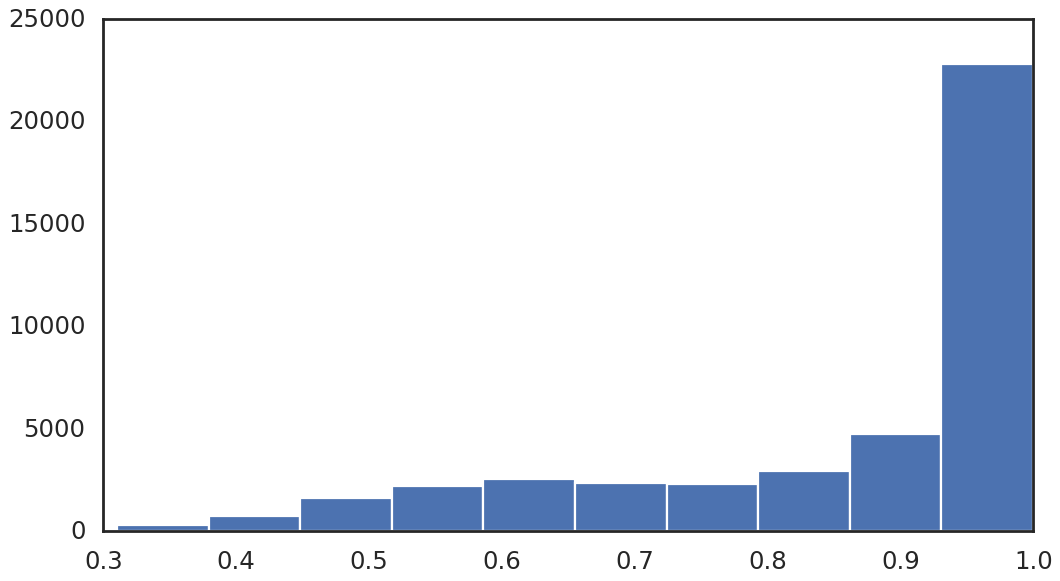

In [315]:
plt.hist(max_sim_prob)  
plt.show()

In [314]:
max_sim_prob.shape

(42596,)